# Import libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# Data Import and Configuration

In [28]:
fuel = pd.read_csv('datasets/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

Input shape: [50]


In [29]:
# original data
print(fuel.head())

# processed features
print(pd.DataFrame(X).head())

   EngDispl  NumCyl Transmission       FE AirAspirationMethod  NumGears  \
0       4.7       8          AM6  28.0198  NaturallyAspirated         6   
1       4.7       8           M6  25.6094  NaturallyAspirated         6   
2       4.2       8           M6  26.8000  NaturallyAspirated         6   
3       4.2       8          AM6  25.0451  NaturallyAspirated         6   
4       5.2      10          AM6  24.8000  NaturallyAspirated         6   

   TransLockup  TransCreeperGear          DriveDesc  IntakeValvePerCyl  \
0            1                 0  TwoWheelDriveRear                  2   
1            1                 0  TwoWheelDriveRear                  2   
2            1                 0      AllWheelDrive                  2   
3            1                 0      AllWheelDrive                  2   
4            0                 0      AllWheelDrive                  2   

   ExhaustValvesPerCyl CarlineClassDesc  VarValveTiming  VarValveLift  
0                    2         2

# Define the network

In [51]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    layers.Dense(units=128, activation='relu'),    
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1),
])

# Add loss and optimizer

In [52]:
model.compile(
    optimizer='adam',
    loss='mae'
)

# Train the model

In [53]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid), 
                    epochs=300, batch_size=64, 
                   )

Epoch 1/300
13/13 [==============================] - 1s 10ms/step - loss: 2.7541 - val_loss: 1.3483
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 0.8706 - val_loss: 0.4422
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3841 - val_loss: 0.3371
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 0.2744 - val_loss: 0.2094
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1807 - val_loss: 0.1676
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1387 - val_loss: 0.1489
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1252 - val_loss: 0.1560
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 0.1211 - val_loss: 0.1249
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 0.0947 - val_loss: 0.1078
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 0.0851 - val_loss: 0.1011
Epoch 11

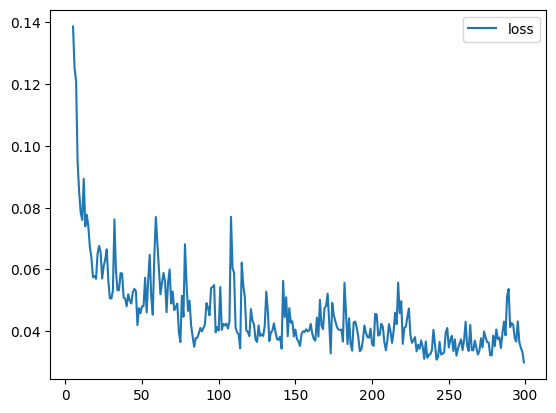

In [54]:
# Training plot

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();